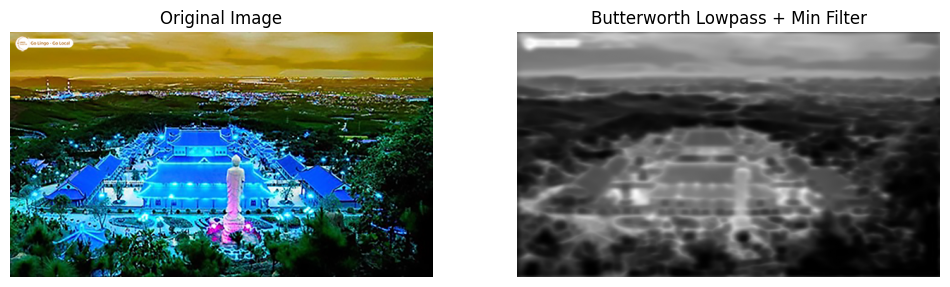

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(image, d0=30, n=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)

    u = np.array(range(rows)) - crow
    v = np.array(range(cols)) - ccol
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / d0)**(2 * n))

    G = dft_shift * H
    img_back = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back

def min_filter(image, kernel_size=3):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

def process_image():
    input_folder = 'exercise'
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)

    filename = 'pagoda.jpg'  # Đổi tên ảnh tại đây nếu cần
    img_path = os.path.join(input_folder, filename)

    if not os.path.exists(img_path):
        print('Ảnh không tồn tại trong thư mục exercise.')
        return

    image = cv2.imread(img_path)

    # Đổi thứ tự màu RGB -> BGR (nếu cần)
    image = image[:, :, ::-1]

    # Áp dụng Butterworth Lowpass Filter
    filtered = butterworth_lowpass_filter(image)

    # Áp dụng Min Filter
    result = min_filter(filtered.astype(np.uint8))

    # Lưu ảnh kết quả
    save_path = os.path.join(output_folder, f'Butterworth_Min_{filename}')
    cv2.imwrite(save_path, result)

    # Hiển thị ảnh
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Butterworth Lowpass + Min Filter')
    plt.imshow(result, cmap='gray')
    plt.axis('off')

    plt.show()

process_image()